In [1]:
#from mpl_toolkits import mplot3d
import pandas as pd
from numpy import array
import numpy as np
import h5py
import mplcursors
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    "pgf.rcfonts": False,

    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": "computer-modern-roman",

    "figure.dpi": 300,
    "savefig.dpi": 300,
})


CMAPS = plt.colormaps
CMAP = CMAPS['hsv']

h = 0.6774  # co-moving constant


In [2]:
g_dat = pd.read_pickle('./beta_data.pickle')

In [33]:
h5dat = h5py.File('./main_branch_orbit_data_snapshot_1200.hdf5')

# for x in dat.values():
#     try:
#         list(x)
#     except:
#         print(x)
#         raise
flydat = pd.DataFrame((list(x) for x in h5dat.values() if x.shape != ()), index=(
    k for k in h5dat.keys() if h5dat[k].shape != ())).transpose().convert_dtypes()
flydat.dtypes

d_entry                   Float64
d_innermost               Float64
dhost_final               Float64
fdrvir_innermost          Float64
fdrvirfinal_innermost     Float64
first_d_peri_all          Float64
first_d_peri_fourth       Float64
first_d_peri_half         Float64
first_d_peri_tenth        Float64
first_d_peri_twentieth    Float64
first_z_peri_all          Float64
first_z_peri_fourth       Float64
first_z_peri_half         Float64
first_z_peri_tenth        Float64
first_z_peri_twentieth    Float64
last_d_peri_all           Float64
last_d_peri_fourth        Float64
last_d_peri_half          Float64
last_d_peri_tenth         Float64
last_d_peri_twentieth     Float64
last_fdrvir_peri_all      Float64
last_mvir_peri_all        Float64
last_rvir_peri_all        Float64
last_z_peri_all           Float64
last_z_peri_fourth        Float64
last_z_peri_half          Float64
last_z_peri_tenth         Float64
last_z_peri_twentieth     Float64
mb_entry                  Float64
mb_today      

In [4]:
dat = g_dat.merge(flydat, left_index=True, right_index=True)



# remove bad data
dat = dat[dat['d_innermost'] < 20000].copy()

# M_tot calculation
dat['M_tot'] = (
    dat['stars_mass_within_r50_stars'] + 
    dat['gas_mass_within_r50_stars'] + 
    dat['dm_mass_within_r50_stars']
)

s_filt = dat['is_satellite']

In [5]:
sum(dat[s_filt]['d_innermost'] != 0)

365

In [6]:
list(dat.keys())

['Mgas_ahf_cat',
 'Mstar_ahf_cat',
 'Mvir_ahf_cat',
 'Redge',
 'Redge_ahf',
 'Rvir',
 'Rvir_ahf',
 'Rvir_ahf_cat',
 'Xc_ahf_cat',
 'Yc_ahf_cat',
 'Zc_ahf_cat',
 'dm_mass_within_r30_dm',
 'dm_mass_within_r30_dm_ahf',
 'dm_mass_within_r30_gas',
 'dm_mass_within_r30_gas_ahf',
 'dm_mass_within_r30_stars',
 'dm_mass_within_r30_stars_ahf',
 'dm_mass_within_r50_dm',
 'dm_mass_within_r50_dm_ahf',
 'dm_mass_within_r50_gas',
 'dm_mass_within_r50_gas_ahf',
 'dm_mass_within_r50_stars',
 'dm_mass_within_r50_stars_ahf',
 'dm_mass_within_r80_dm',
 'dm_mass_within_r80_dm_ahf',
 'dm_mass_within_r80_gas',
 'dm_mass_within_r80_gas_ahf',
 'dm_mass_within_r80_stars',
 'dm_mass_within_r80_stars_ahf',
 'galaxyID',
 'gas_mass_within_r30_dm',
 'gas_mass_within_r30_dm_ahf',
 'gas_mass_within_r30_gas',
 'gas_mass_within_r30_gas_ahf',
 'gas_mass_within_r30_stars',
 'gas_mass_within_r30_stars_ahf',
 'gas_mass_within_r50_dm',
 'gas_mass_within_r50_dm_ahf',
 'gas_mass_within_r50_gas',
 'gas_mass_within_r50_gas_ahf',

In [7]:
np.mean(dat[s_filt]['d_innermost'])

109.43703391512443

Text(0, 0.5, '$\\beta$')

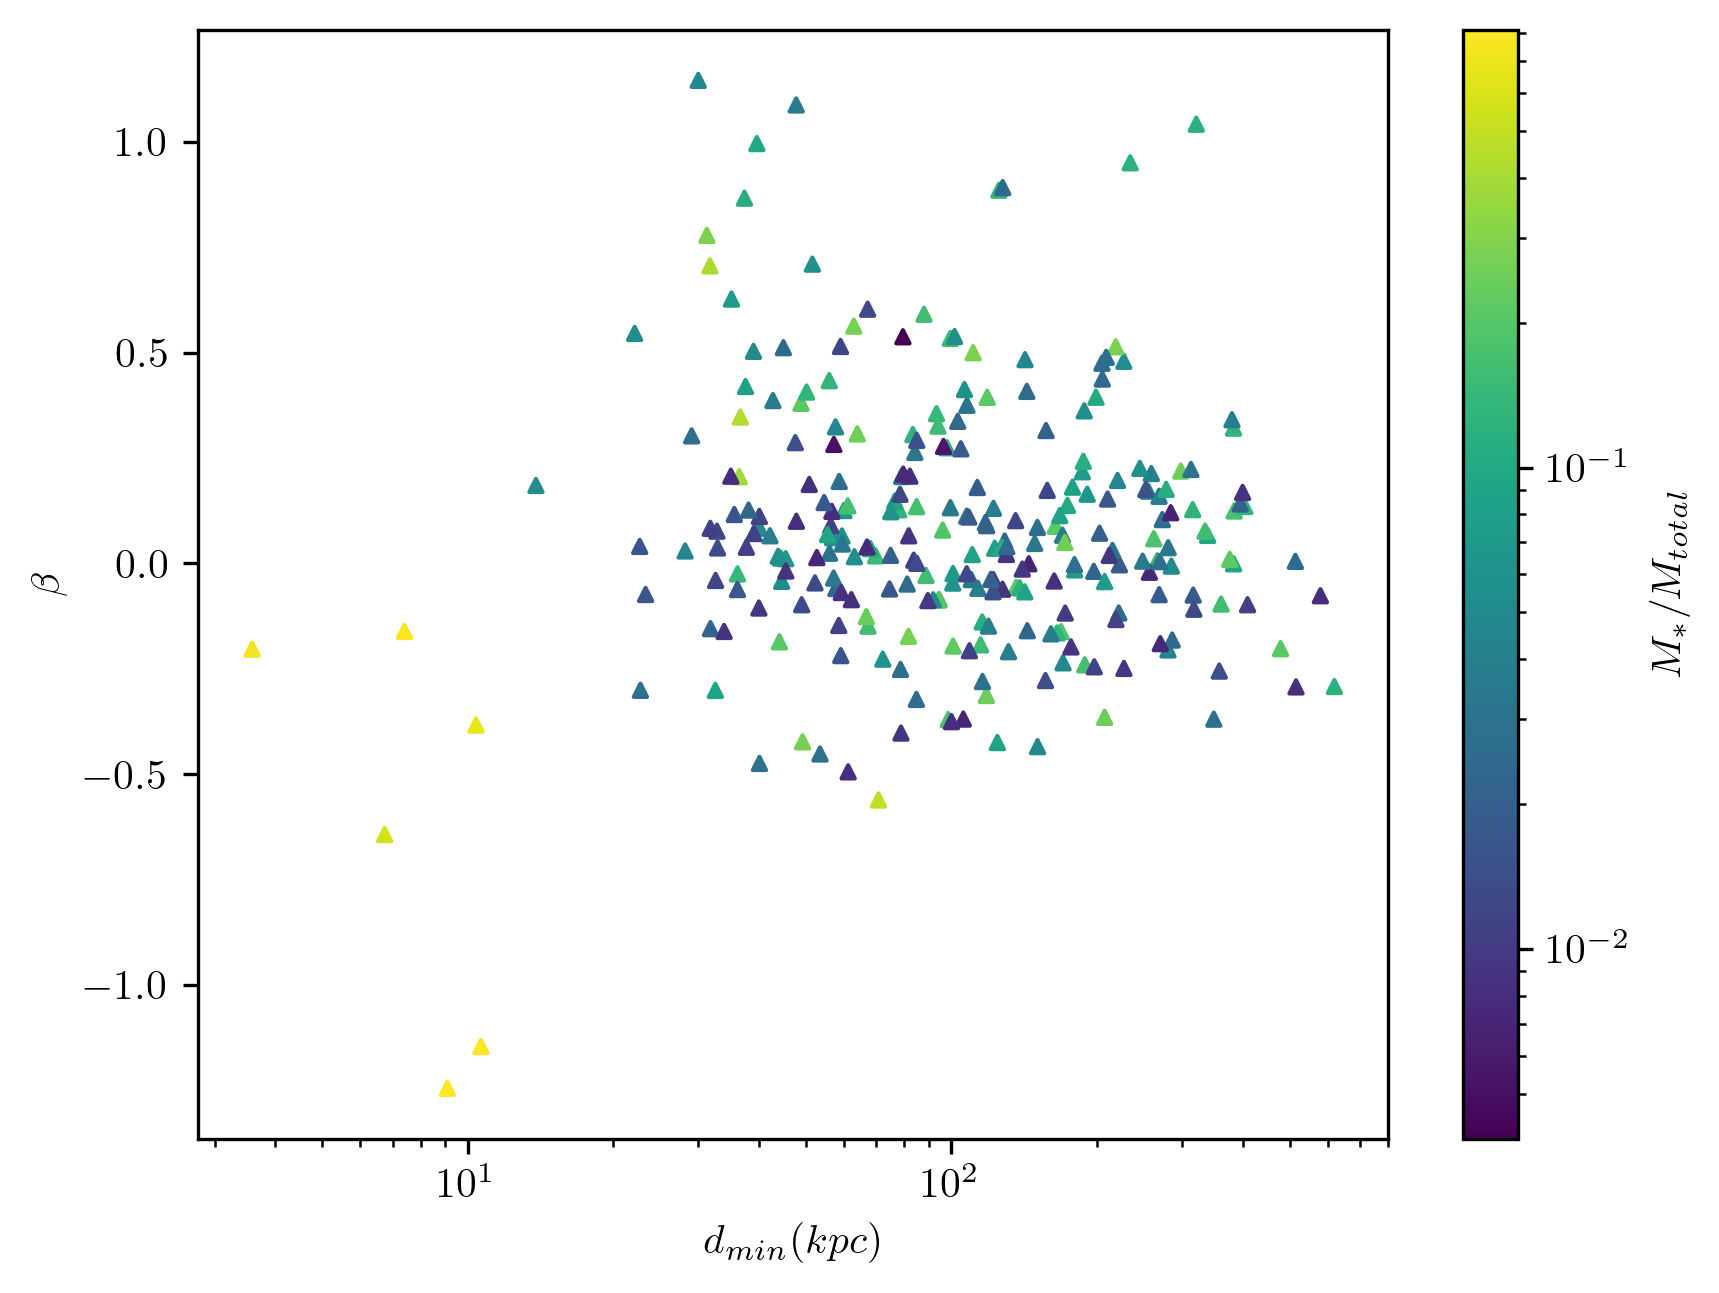

In [8]:



fig, ax = plt.subplots()

ax.set_xscale('log')


filt = dat['is_satellite'] & (dat['d_innermost'] != 0) & (dat['stars_mass_within_r50_stars'] <= 1e9)

c = dat[filt]['stars_mass_within_r50_stars'] / dat[filt]['M_tot']

_scatter = ax.scatter(
    dat[filt]['d_innermost'],
    dat[filt]['beta_r50'],
    s=10,
    marker='^',
    c=c,
    # log scale for colors
    norm=mpl.colors.LogNorm(np.min(c), np.max(c))
)

cbar = fig.colorbar(_scatter, ax=ax)
cbar.set_label(r'$M_*/M_{total}$')

ax.set_xlabel(r'$d_{min} (kpc)$')
ax.set_ylabel(r'$\beta$')


In [15]:
dat.loc[dat['galaxyID'] == 2, 'rvir_innermost']

608.5769117212873

In [24]:
flydat[flydat['d_innermost'] != 0]

,d_entry,d_innermost,dhost_final,fdrvir_innermost,fdrvirfinal_innermost,first_d_peri_all,first_d_peri_fourth,first_d_peri_half,first_d_peri_tenth,first_d_peri_twentieth,...,mt_today,mvir_innermost,n_peri_all,n_peri_fourth,n_peri_half,n_peri_tenth,n_peri_twentieth,rvir_innermost,z_entry,z_innermost
18,584.319501,35.012630,152.156039,0.051829,0.051112,35.012630,35.012630,35.012630,35.012630,35.012630,...,1.633437e+12,1.746605e+13,1.0,1.0,1.0,1.0,0.0,675.540005,0.10369,0.01783
23,0.000000,495.930291,495.930291,1.169352,1.169352,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,9.654945e+11,4.190035e+12,-1.0,-1.0,-1.0,-1.0,-1.0,424.106879,0.00000,0.00000
26,0.000000,21852.470291,21852.470291,35.907492,35.907492,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,7.230174e+11,1.238090e+13,-1.0,-1.0,-1.0,-1.0,-1.0,608.576912,0.00000,0.00000
31,480.616515,22.092368,60.254281,0.035311,0.035210,78.696056,78.696056,78.696056,78.696056,78.696056,...,4.526247e+11,1.364138e+13,2.0,2.0,2.0,1.0,1.0,625.652128,0.26869,0.00803
65,260.035054,22.316395,28.297814,0.047566,0.047502,161.663140,161.663140,161.663140,161.663140,161.663140,...,1.875524e+11,5.720283e+12,3.0,2.0,2.0,1.0,1.0,469.168129,0.49881,0.00480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697,248.416726,106.422923,332.842741,0.234240,0.169614,171.634189,171.634189,171.634189,171.634189,171.634189,...,5.174048e+08,9.005595e+12,3.0,2.0,2.0,0.0,0.0,454.333198,1.12838,0.32770
1703,463.479263,113.144332,623.741232,0.213709,0.165170,113.144332,113.144332,113.144332,113.144332,113.144332,...,5.180602e+08,1.108345e+13,1.0,1.0,1.0,0.0,0.0,529.431075,0.32211,0.17824
1707,137.422965,54.580818,165.324187,0.364367,0.158499,54.580818,54.580818,54.580818,54.580818,54.580818,...,4.767685e+08,1.127786e+12,2.0,1.0,2.0,0.0,0.0,149.796280,1.44186,1.18750
1717,337.136432,130.171469,226.567167,0.243610,0.213895,130.171469,130.171469,130.171469,130.171469,130.171469,...,2.181355e+08,1.351047e+13,2.0,1.0,2.0,0.0,0.0,534.344005,0.64829,0.27902


In [25]:
list(flydat.columns)

['d_entry',
 'd_innermost',
 'dhost_final',
 'fdrvir_innermost',
 'fdrvirfinal_innermost',
 'first_d_peri_all',
 'first_d_peri_fourth',
 'first_d_peri_half',
 'first_d_peri_tenth',
 'first_d_peri_twentieth',
 'first_z_peri_all',
 'first_z_peri_fourth',
 'first_z_peri_half',
 'first_z_peri_tenth',
 'first_z_peri_twentieth',
 'last_d_peri_all',
 'last_d_peri_fourth',
 'last_d_peri_half',
 'last_d_peri_tenth',
 'last_d_peri_twentieth',
 'last_fdrvir_peri_all',
 'last_mvir_peri_all',
 'last_rvir_peri_all',
 'last_z_peri_all',
 'last_z_peri_fourth',
 'last_z_peri_half',
 'last_z_peri_tenth',
 'last_z_peri_twentieth',
 'mb_entry',
 'mb_today',
 'mdm_entry',
 'mdm_today',
 'mg_entry',
 'mg_today',
 'ms_entry',
 'ms_today',
 'mt_entry',
 'mt_today',
 'mvir_innermost',
 'n_peri_all',
 'n_peri_fourth',
 'n_peri_half',
 'n_peri_tenth',
 'n_peri_twentieth',
 'rvir_innermost',
 'z_entry',
 'z_innermost']

In [26]:
# rvirs = np.zeros(dat.shape[0])
# for i, row in dat.iterrows():
#     if row['groupID'] == -1:
#         continue
#     rvirs[i] = dat[
#         dat['galaxyID'] == row['groupID']
#     ][row['groupID']] / h
    

Text(0, 0.5, '$\\beta$')

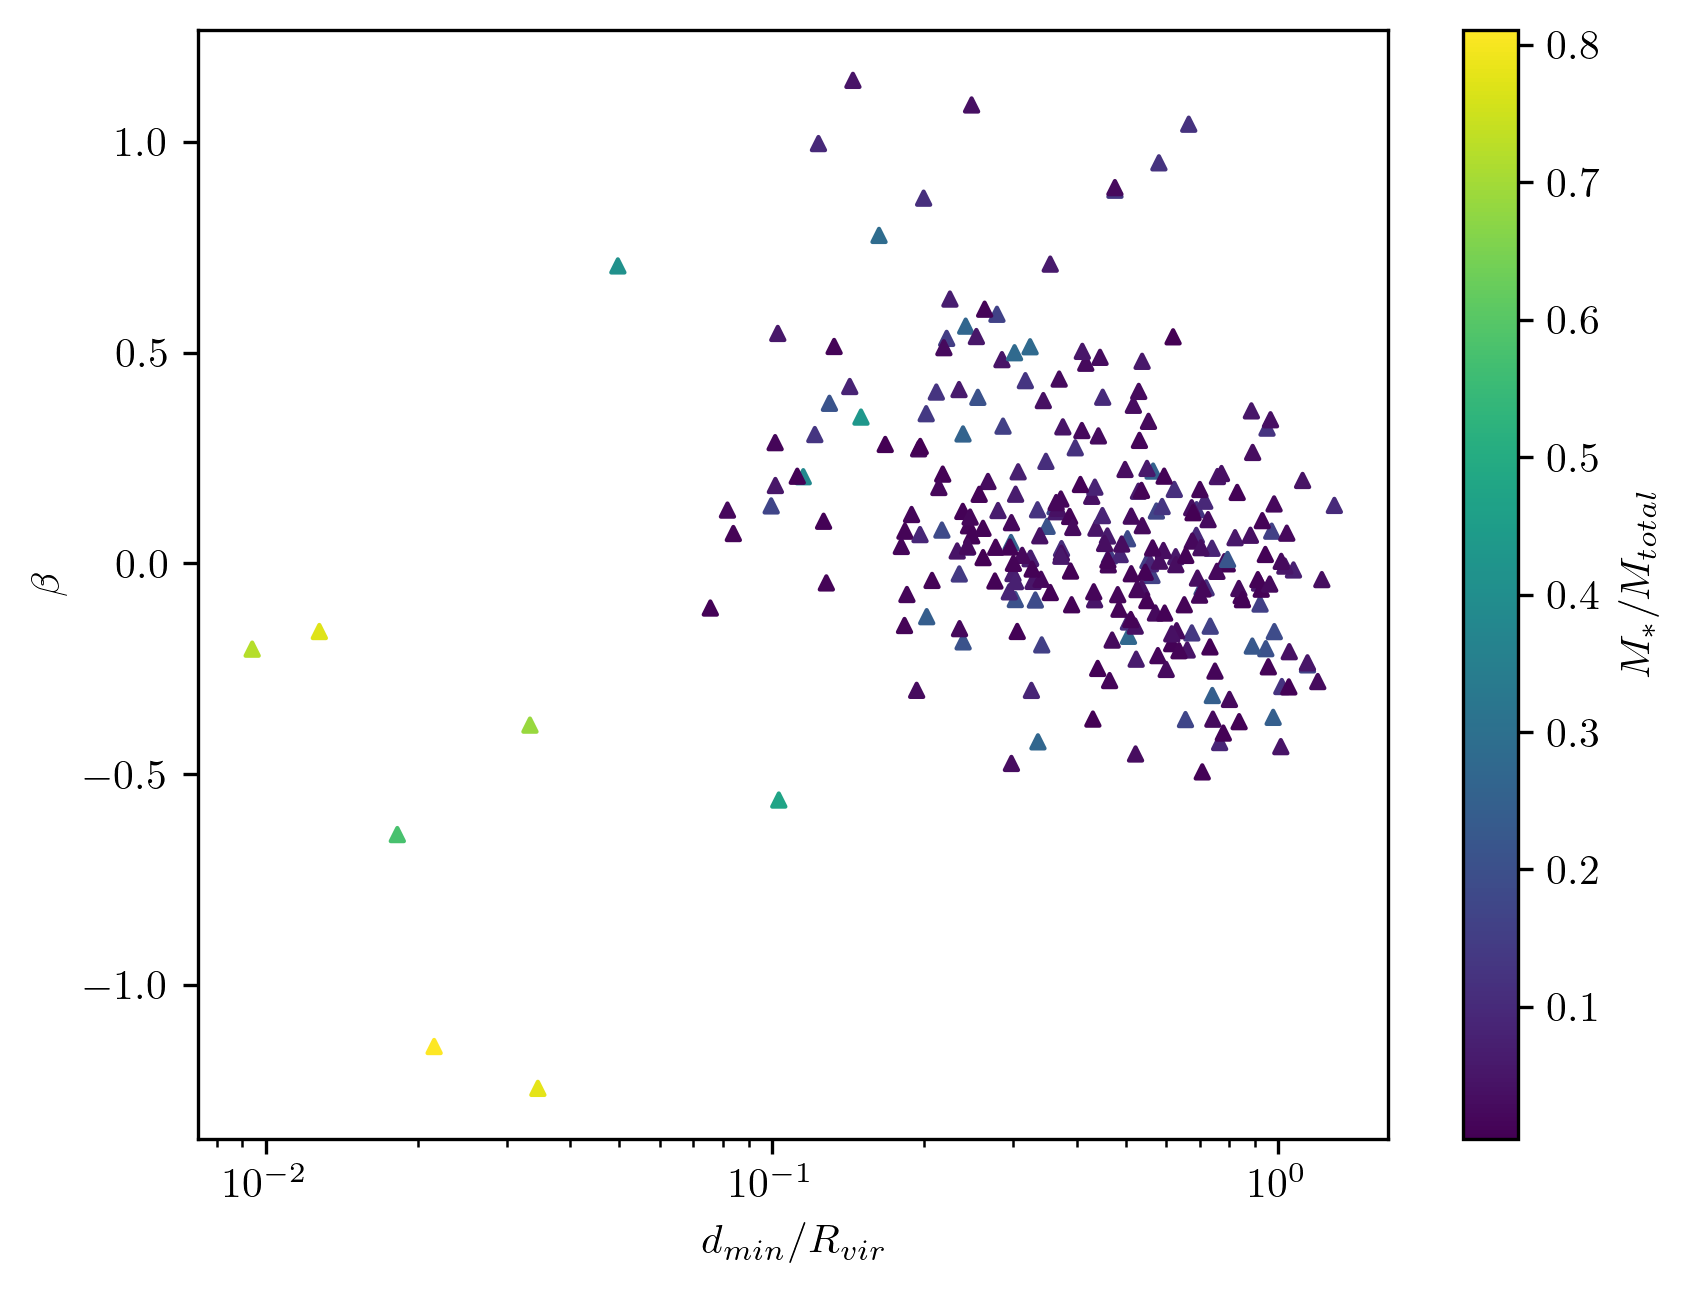

In [36]:
fig, ax = plt.subplots()

ax.set_xscale('log')


filt = dat['is_satellite'] & (dat['d_innermost'] != 0) & (dat['stars_mass_within_r50_stars'] <= 1e9)

c = dat[filt]['stars_mass_within_r50_stars'] / dat[filt]['M_tot']
# c = dat[filt]['n_peri_all']

_scatter = ax.scatter(
    dat[filt]['d_innermost'] / dat[filt]['rvir_innermost'],
    dat[filt]['beta_r50'],
    s=10,
    marker='^',
    c=c,
    # log scale for colors
    # norm=mpl.colors.LogNorm(np.min(c), np.max(c))
)

cbar = fig.colorbar(_scatter, ax=ax)
cbar.set_label(r'$M_*/M_{total}$')

ax.set_xlabel(r'$d_{min}/R_{vir}$')
ax.set_ylabel(r'$\beta$')

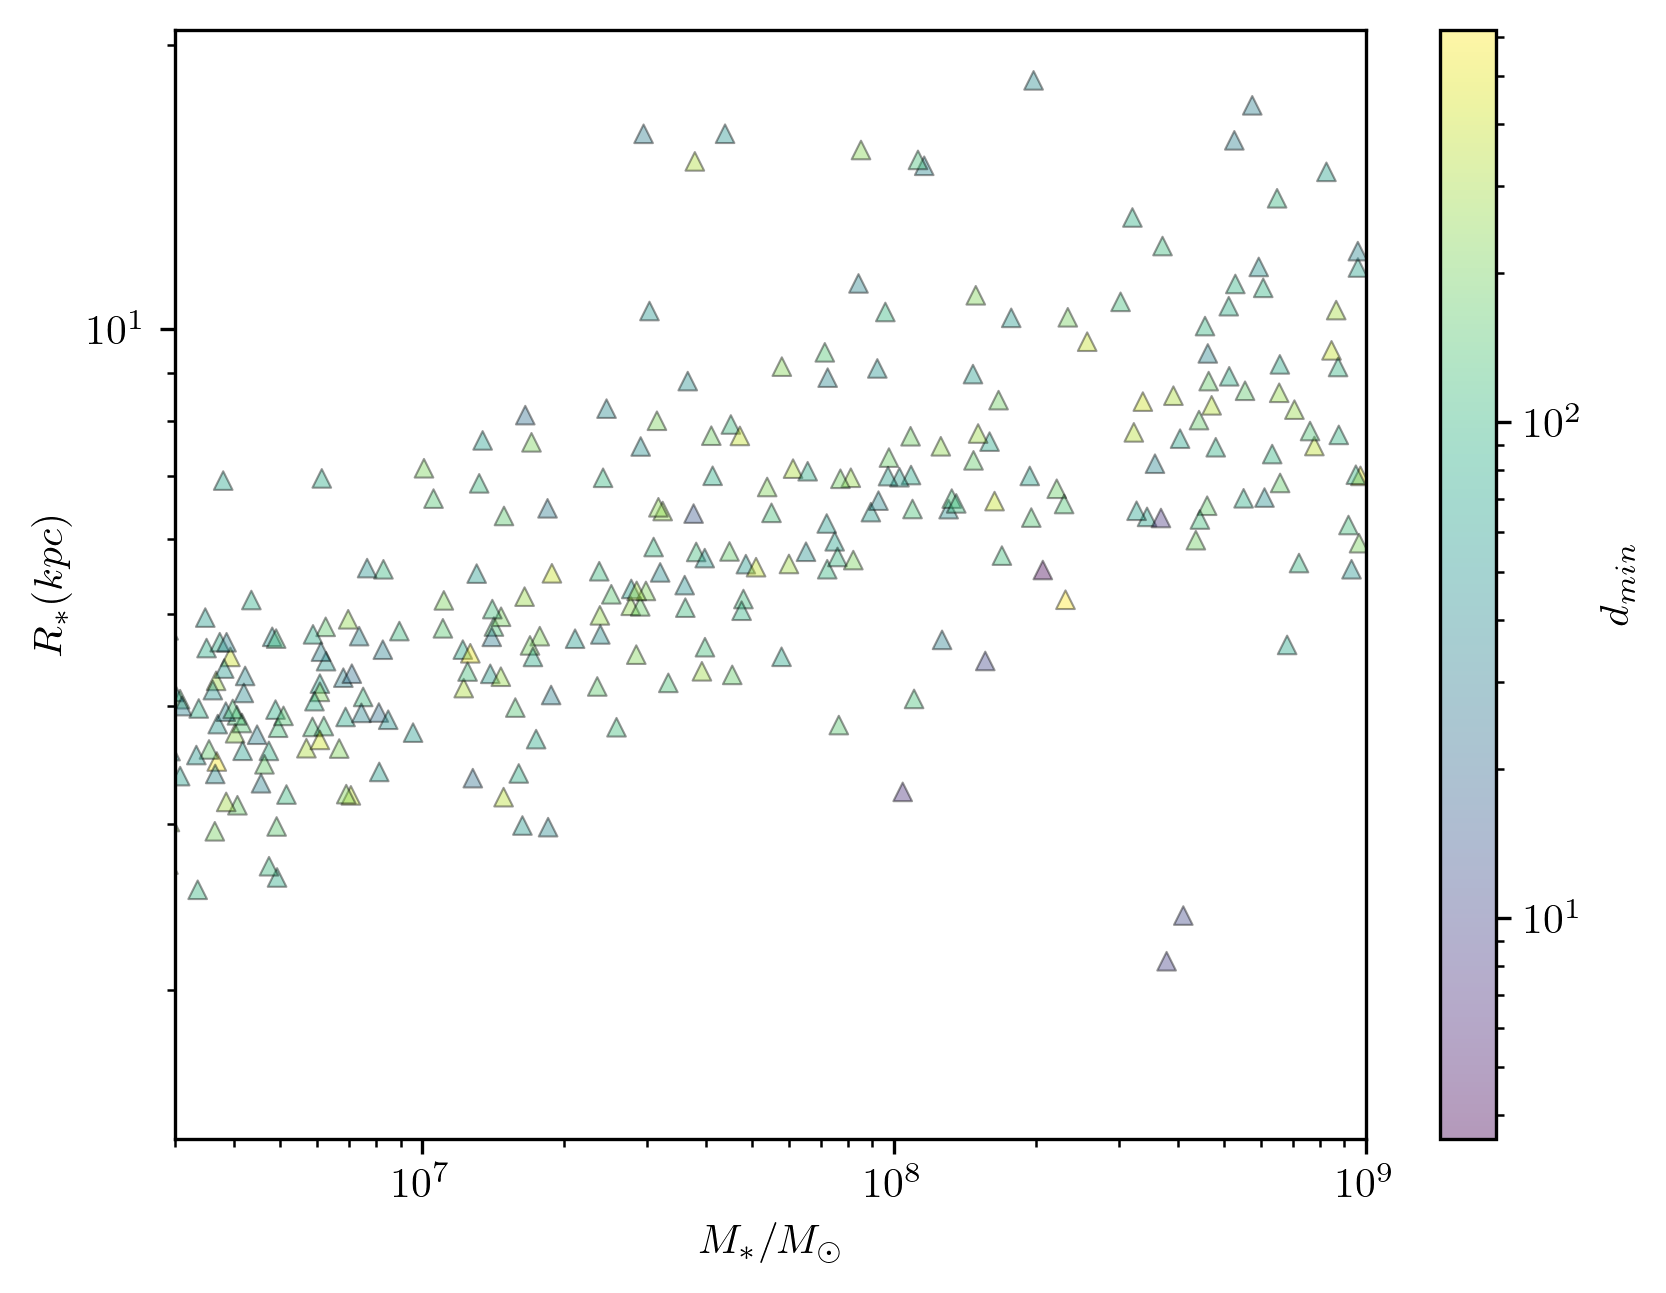

In [26]:

fig = plt.figure()
ax = plt.axes()

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(3e6, 1e9)

ax.set_xlabel(r'$M_{*} / M_\odot$')
ax.set_ylabel(r'$R_{*} (kpc)$')
d = dat
x, y = d[filt]['stars_mass_within_r50_stars_ahf'], d[filt]['r50_stars_ahf'] / h

c=d[filt]['d_innermost']

_m = ax.scatter(x, y, alpha=0.4, s=20, marker='^',
                edgecolor='black', linewidth=0.5,
                c=c,
                norm=mpl.colors.LogNorm(np.min(c), np.max(c))
                )
fig.colorbar(_m, ax=ax).set_label(r'$d_{min}$')